# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [194]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [111]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [149]:
X.shape

(70000, 784)

In [150]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

In [151]:
X_T = np.reshape(X[35], (28, 28))

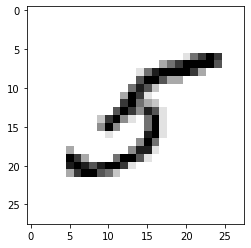

In [152]:
plt.imshow(X_T, cmap = matplotlib.cm.binary, interpolation="nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [153]:
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [154]:
X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000]
y_test = y[60000:] 

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [155]:
y_train_5 = np.where(y_train == "5", 1, 0)
y_test_5 = np.where(y_test == "5", 1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [156]:
clf = LogisticRegression()
model = clf.fit(X_train, y_train_5)
y_test_5_predict = model.predict(X_test)
confusion_matrix(y_test_5, y_test_5_predict)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[9034,   74],
       [ 147,  745]])

#### Does the classifier predict correctly the 35th digit we picked before?

In [179]:
clf = LogisticRegression()
model = clf.fit(X_train, y_train_5)
y_train_5_predict = model.predict(X_train)
y_train_5_predict[35]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1

> Yes, it predicts it correctly.

#### The 36000th value is a 9. Check if it was correctly predicted.

In [181]:
y_train_9 = np.where(y_train == "9", 1, 0)
y_test_9 = np.where(y_test == "9", 1, 0)

clf = LogisticRegression()
model = clf.fit(X_train, y_train_9)
y_9_train_predict = model.predict(X_train)

y_9_train_predict[36000] 
confusion_matrix(y_train_9, y_9_train_predict)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[52998,  1053],
       [ 1173,  4776]])

In [182]:
# your comments here

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [164]:
# Libraries
from sklearn.base import BaseEstimator

In [165]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [166]:
y_never5_pred = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [191]:
# CLF NEVER5 SCORES
from sklearn.metrics import precision_score
confusion_matrix_never5 = confusion_matrix(y_test_5, y_never5_pred) 
print(confusion_matrix_never5)

f1_score_never5 = f1_score(y_test_5, y_never5_pred)
print(f1_score_never5)

average_precision_never5 = precision_score(y_test_5, y_never5_pred)
print(average_precision_never5)

recall_score_never5 = recall_score(y_test_5, y_never5_pred)
print(recall_score_never5)

[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


> As expected, the recall dummy classifier has very low scores. 

In [192]:
confusion_matrix_5 = confusion_matrix(y_train_5, y_train_5_predict)
print(confusion_matrix_5)

f1_score_5 = f1_score(y_train_5, y_train_5_predict)
print(f1_score_5)

average_precision_5 = precision_score(y_train_5, y_train_5_predict)
print(average_precision_5)

recall_score_5 = recall_score(y_train_5, y_train_5_predict)
print(recall_score_5)

[[54153   426]
 [  905  4516]]
0.871562288912477
0.9138000809388911
0.8330566316177827


> The logistic regression works very well. 

#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

> They indicate how close is our predicted target to the true ground.

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [197]:
roc_curve(y_test_5, y_never5_pred)

(array([0., 1.]), array([0., 1.]), array([1., 0.]))

In [196]:
roc_curve(y_train_5, y_train_5_predict)

(array([0.       , 0.0078052, 1.       ]),
 array([0.        , 0.83305663, 1.        ]),
 array([2, 1, 0]))

#### Now find the roc_auc_score for each. 

In [ ]:
# your code here

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here